In [2]:
import scipy
import numpy as np
from scipy.ndimage import rotate
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation
from numpy import cos, sin, pi
import torch
import copy
import h5py
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [176]:
v = np.array([1,2,3])

In [177]:
m = Rotation.random()
r = m.as_matrix()
angles = m.as_euler('zxy')
angles

array([-2.97267173, -0.26871357,  1.34937866])

In [210]:
def zrot(thz):
    return np.array([[cos(thz), sin(thz), 0],
                 [-sin(thz), cos(thz), 0],
                 [0,0,1]
                ])

def yrot(thy):
    return np.array([[cos(thy), 0, sin(thy)],
                 [0, 1, 0],
                 [-sin(thy),0,cos(thy)]
                ])

def xrot(thx):
    return np.array([
                 [1, 0, 0],
                 [0, cos(thx), sin(thx)],
                 [0, -sin(thx), cos(thx)]
                ])


def rot(v, thz, thx, thy, signs):
    yr = yrot(signs[0]*thy)
    zr = zrot(signs[1]*thz)
    xr = xrot(signs[2]*thx)
    
    return np.einsum('ij,jk,kl,l-> i', yr,xr,zr, v)

In [211]:
v1 = np.einsum('ij,j->i', r, v)
v1

array([ 3.23327553, -1.26639284,  1.39362065])

In [213]:
signss = [(i,j,k) for i in (-1,1) for j in (-1,1) for k in (-1,1)]
res = []
for signs in signss:
    v2 = rot(v,*angles,signs=signs)
    if ((v2-v1)**2).sum() < 0.01:
        print(signs, v2)
    # res.append()

(1, -1, -1) (array([ 3.23327553, -1.26639284,  1.39362065]),)


In [214]:
d = 10
m = np.array([[(i-d/2)**2 + (j-d/2)**2 for i in range(d)] for j in range(d)])

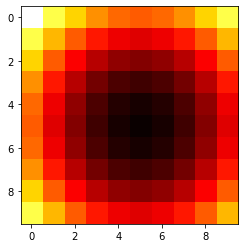

In [215]:
plt.imshow(m, cmap='hot', interpolation='nearest')
plt.show()

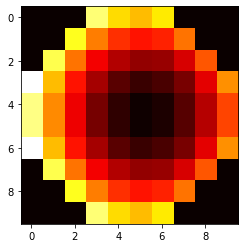

In [216]:
mode = 'constant'
angle = 45
m2 = rotate(m, angle, axes=[0,1], reshape=False, order=3, mode=mode)

plt.imshow(m2, cmap='hot', interpolation='nearest')
plt.show()

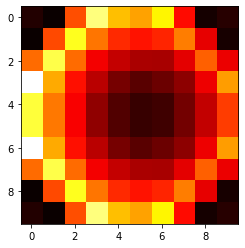

In [16]:
mode = 'grid-constant'
angle = 45
m2 = rotate(m, angle, axes=[0,1], reshape=False, order=3, mode=mode)

plt.imshow(m2, cmap='hot', interpolation='nearest')
plt.show()

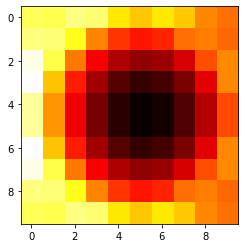

In [18]:
mode = 'nearest'
angle = 45
m2 = rotate(m, angle, axes=[0,1], reshape=False, order=3, mode=mode)

plt.imshow(m2, cmap='hot', interpolation='nearest')
plt.show()

# Debug 3d rots

In [34]:
def rotate(m, angles, mode='constant', cval=0, order=3):
    ret = np.array(m)
    axes = [(0, 1), (1, 2), (0, 2)]
    
    print(f"m.sum(), m.std() = {m.sum()}, {m.std()}")

    for axis,angle in zip(axes, angles):
        angle = angle / np.pi * 180
        ret = scipy.ndimage.rotate(ret, angle, axes=axis, reshape=False, order=order, mode=mode, cval=cval)
        print(f'ret.dtype : {ret.dtype}')
        print(f"axes={axis}, order={order}, mode={mode}, cval={cval}")
        print(f"m.sum(), m.std() = {ret.sum()}, {ret.std()}")
    return ret

In [62]:
grid = '/home/lorenzo/3dunet-cavity/runs/test_features_rot_dbg/tmp/4us3/grids.h5'
h5 = h5py.File(grid, 'r')
x = list(np.array(h5['labels']).astype("<f8"))
h5.close()

In [63]:
x

[array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [35]:
fname_orig = '/home/lorenzo/3dunet-cavity/runs/test_features_dbg/checkpoint/dumps/4us3.h5'
fname_rot = '/home/lorenzo/3dunet-cavity/runs/test_features_rot_dbg/checkpoint/dumps/4us3.h5'
h5_orig =  h5py.File(fname_orig, 'r')
h5_rot =  h5py.File(fname_rot, 'r')

# angles = [-2.7395890131658596, -0.04360928806154685, 2.903099733230921]
angles = [0.020267915913812128, -0.565809069940298, -1.7957610124250032]

In [36]:
vrot = rotate(np.array(h5_orig['labels']), angles)
vrot.sum(), vrot.std()

m.sum(), m.std() = 3433.0, 0.028669528663158417
ret.dtype : float32
axes=(0, 1), order=3, mode=constant, cval=0
m.sum(), m.std() = 3433.000244140625, 0.02863243594765663
ret.dtype : float32
axes=(1, 2), order=3, mode=constant, cval=0
m.sum(), m.std() = 3433.22021484375, 0.02848285436630249
ret.dtype : float32
axes=(0, 2), order=3, mode=constant, cval=0
m.sum(), m.std() = 3433.220703125, 0.028370685875415802


(3433.2207, 0.028370686)

In [7]:
field = 'labels'
(np.array(h5_orig[field]).sum(), np.array(h5_orig[field]).std()), 

((3433.0, 0.028669529),)

In [8]:
field = 'labels'
(np.array(h5_rot[field]).sum(), np.array(h5_rot[field]).std())

(53.0, 0.0035636507)

In [58]:
h5_orig.close()
h5_rot.close()

In [394]:
field = 'raws_0'
(np.array(h5_orig[field]).sum(), np.array(h5_orig[field]).std()), (np.array(h5_rot[field]).sum(), np.array(h5_rot[field]).std())

((3702.0, 0.029770456), (3701.946, 0.021955043))

In [396]:
field = 'raws_1'
(np.array(h5_orig[field]).sum(), np.array(h5_orig[field]).std()), (np.array(h5_rot[field]).sum(), np.array(h5_rot[field]).std())

((-0.004432678, 0.9999989), (9.199687, 0.90318793))